In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import numpy.fft as fft

from scipy.signal import welch


## Linear Algebra


In [305]:
## Vector

v =np.array([2,3,4])
p =np.array([2,5,4])

dot_vp = np.dot(v,p)
print(dot_vp)

35


In [306]:
v1 =np.array([[2,3,4],
            [2,5,4]])
        
print(v1.size)

print(v1[:,:-1])



6
[[2 3]
 [2 5]]


In [307]:
## matrix multiplication

v1 =np.array([[2,3,4],
            [2,5,4]])

v2 =np.array([[2,0,4],
            [2,2,2],
            [2,2,2]])

c =v1.dot(v2)

print(c)

print(v1.shape, v2.shape, c.shape)

[[18 14 22]
 [22 18 26]]
(2, 3) (3, 3) (2, 3)


In [308]:
v1 =np.array([[2,3,4],
            [2,5,4]])

v2 =np.array([[2],
            [2],
            [2]])

c =v1.dot(v2)

print(c)

print(v1.shape, v2.shape, "-->", c.shape)

[[18]
 [22]]
(2, 3) (3, 1) --> (2, 1)


In [309]:
v1_T =v1.T
print(v1_T)
print(v1_T.shape)

[[2 2]
 [3 5]
 [4 4]]
(3, 2)


In [310]:
sq_matrix = np.array([[13,12,4],
                      [2,10, 5],
                      [3,5, 0]])
det_sm = np.linalg.det(sq_matrix)
print(det_sm)

-225.0


In [311]:
rand_sq_matrix = np.random.randint(0, 4,(3,3))
print(rand_sq_matrix)

[[3 2 1]
 [0 3 3]
 [2 3 2]]


In [312]:
## Inverse of a matrix
## (adjoint of a matrix)/det of the matrix
## cofactor transpose of a matrix is adjoint of a matrix


In [313]:


print("**"*24)

inverse_matrix=np.linalg.inv(rand_sq_matrix)

print("direct inverse calculation\n", np.linalg.inv(rand_sq_matrix))

************************************************
direct inverse calculation
 [[ 1.          0.33333333 -1.        ]
 [-2.         -1.33333333  3.        ]
 [ 2.          1.66666667 -3.        ]]


In [314]:
## element print of the inverse matrix
for i in inverse_matrix.T:
    for j in i:
        print(j)

1.0000000000000002
-2.0000000000000004
2.0000000000000004
0.33333333333333354
-1.333333333333334
1.6666666666666672
-1.0000000000000007
3.0000000000000013
-3.000000000000001


In [315]:
rank = np.linalg.matrix_rank(inverse_matrix)
print(rank)

3


In [316]:
eigvals, eigvecs = np.linalg.eig(rand_sq_matrix)
print(eigvals,'\n', "**"*5,'\n',eigvecs)

[-0.24889793  1.89780448  6.35109345] 
 ********** 
 [[-0.18806948 -0.81182742 -0.52719216]
 [ 0.66629867  0.54807774 -0.56677977]
 [-0.72157879 -0.20136294 -0.63311066]]


## Signal Processing


(1000,)
(1000,)


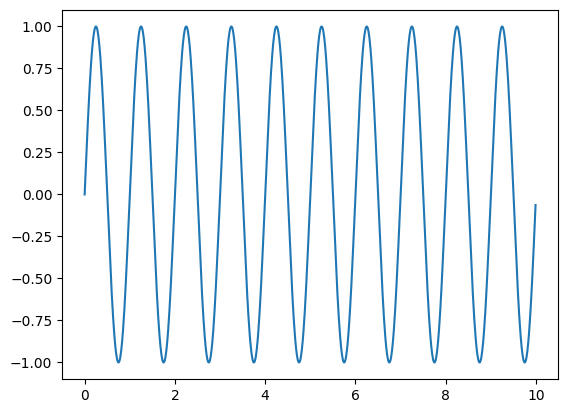

In [3]:
input = np.arange(0, 10, 0.01)
print(input.shape)


## frequency 
w = 1
output = np.sin(2*np.pi*w*input)

plt.plot(input,output)
print(output.shape)

Text(0, 0.5, 'magnitude')

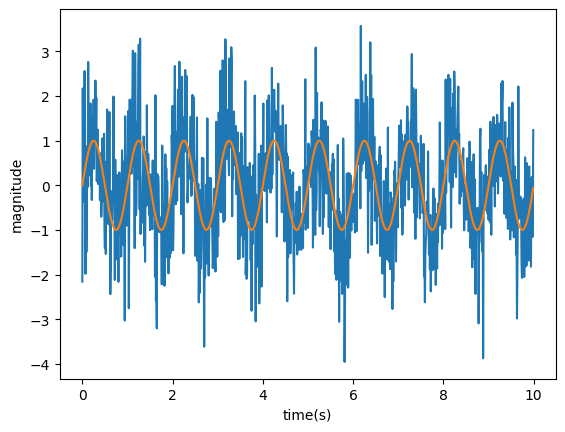

In [4]:
noise = np.random.randn(1000)
noise.shape

noisy_op = output + noise

plt.plot(input, noisy_op)
plt.plot(input, output)
plt.xlabel('time(s)')
plt.ylabel('magnitude')

1000


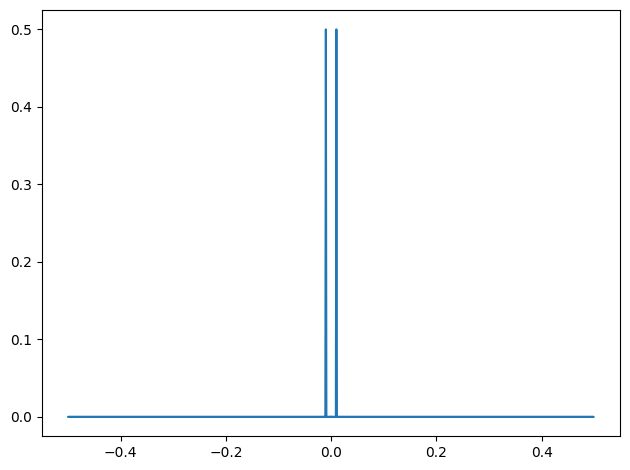

In [15]:
## FFT
N = len(output) ## number of sample
print(N)
out_fft = fft.fft(output) 
out_fft_mag = np.abs(out_fft)/N
freq = fft.fftfreq(N)

plt.plot(freq, out_fft_mag)
plt.tight_layout()

In [8]:
## 
## filter length
M=200

Y= np.array([noisy_op[i:i+M] for i in range(N-M+1)])
output_delay = output[M-1:]

Y.shape

(801, 200)

In [9]:
## auto correlation

R = Y.T@Y
p=Y.T@output_delay

print(R.shape)
print(p.shape)

h_opt =np.linalg.solve(R,p)
print(h_opt)

(200, 200)
(200,)
[ 5.72313750e-03  6.97608491e-03  7.54179150e-03  8.03271578e-03
  8.37179359e-03  8.66235983e-03  8.91830095e-03  8.58429583e-03
  8.75156964e-03  8.59120348e-03  8.40138034e-03  7.86525972e-03
  6.78352563e-03  6.07735864e-03  5.76531618e-03  5.63942301e-03
  5.30773799e-03  4.50900871e-03  3.85020392e-03  3.42314254e-03
  2.68489173e-03  2.18757017e-03  2.08166890e-03  2.22245242e-03
  1.87542672e-03  2.06963844e-03  1.42389260e-03  1.57232052e-03
  1.03705428e-03  4.48599856e-05 -4.72240208e-04 -1.54070742e-03
 -1.70754153e-03 -2.80075554e-03 -3.33589835e-03 -3.14626566e-03
 -3.39961009e-03 -4.30939775e-03 -4.08833314e-03 -3.56349147e-03
 -3.35463466e-03 -3.50079709e-03 -4.54707168e-03 -4.36922454e-03
 -3.96160639e-03 -4.32751499e-03 -3.64857020e-03 -4.39621717e-03
 -4.16616167e-03 -4.27328306e-03 -5.22103933e-03 -4.98326986e-03
 -5.93536915e-03 -6.19857295e-03 -6.80685731e-03 -8.08215295e-03
 -8.19306028e-03 -8.37985007e-03 -8.64452897e-03 -8.11377314e-03
 -7.561

In [11]:
s_hat =Y@h_opt

s_hat.shape

(801,)

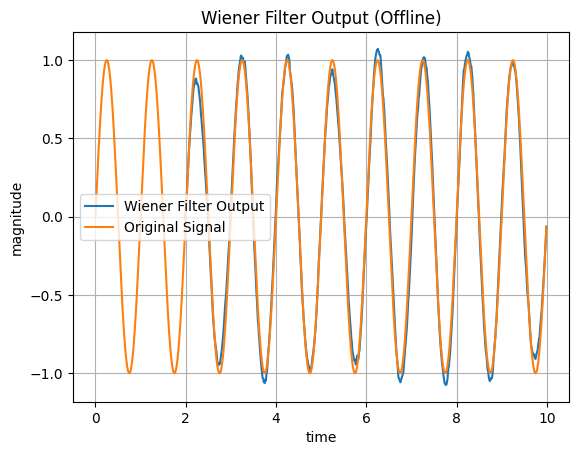

In [12]:
plt.plot(input[M-1:],s_hat)
plt.plot(input, output)
plt.title("Wiener Filter Output (Offline)")
plt.xlabel('time')
plt.ylabel('magnitude')
plt.legend(['Wiener Filter Output','Original Signal'])
plt.grid()
plt.show()

### Implementing Wiener Filter for an audio file
 

In [19]:
from scipy.io import wavfile
import numpy as np
import numpy.random as random

fs, x = wavfile.read(r"D:\CS\Signal-Processing\Sample Data\1-4211-A-12.wav")   # x may be int16
x = x.astype(np.float32)

# If stereo → average channels
if x.ndim == 2:
    x = x.mean(axis=1)

print(fs, x.dtype, x.shape)

44100 float32 (220500,)


In [23]:
noisy_x = x + np.random.normal(0, 10, len(x))

print(fs, noisy_x.dtype, noisy_x.shape)

44100 float64 (220500,)


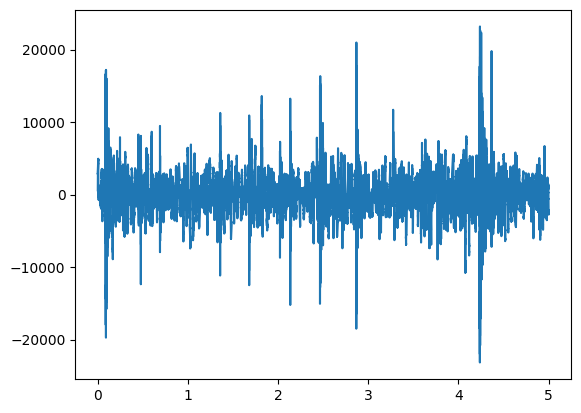

In [24]:
import plotly.graph_objects as go

t = np.arange(len(x)) / fs

plt.plot(t,x)

plt.show()


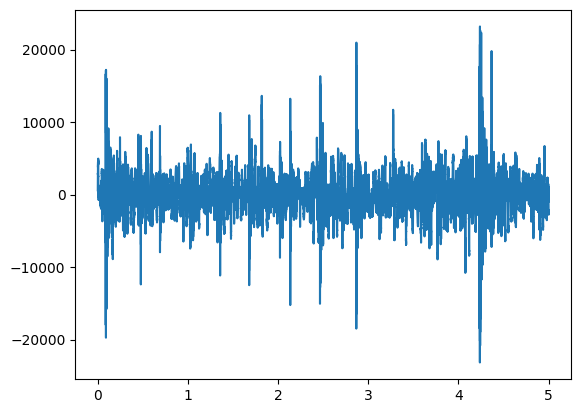

In [25]:
plt.plot(t, noisy_x)

In [ ]:
## 
## filter length
M=200

Y= np.array([noisy_op[i:i+M] for i in range(N-M+1)])
output_delay = output[M-1:]

Y.shape

In [ ]:
## auto correlation

R = Y.T@Y
p=Y.T@output_delay

print(R.shape)
print(p.shape)

h_opt =np.linalg.solve(R,p)
print(h_opt)